In [8]:
import numpy as np
from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

start = Time('2020-11-05T13:55:00') #this is UTC
#end = start+timedelta(days=1)
#end = Time(datetime.now())
end = Time('2020-11-05T14:33:30') #this is UTC
#start = end - timedelta(seconds=5)

In [53]:
df = await client.select_time_series('lsst.sal.Rotator.Application', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfe = await client.select_time_series('lsst.sal.Rotator.logevent_controllerState', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfi = await client.select_time_series('lsst.sal.Rotator.logevent_inPosition', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [54]:
dfi

,inPosition,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-11-05 13:55:13.149000+00:00,True,0,-1947880953,1.604585e+09,38,1.604585e+09,c25b8c34,16,1.604585e+09
2020-11-05 13:55:14.147000+00:00,False,0,-1947880953,1.604585e+09,38,1.604585e+09,c25b8c34,17,1.604585e+09
2020-11-05 13:55:45.151000+00:00,True,0,-1947880953,1.604585e+09,38,1.604585e+09,c25b8c34,18,1.604585e+09
2020-11-05 13:55:46.146000+00:00,False,0,-1947880953,1.604585e+09,38,1.604585e+09,c25b8c34,19,1.604585e+09
2020-11-05 13:56:01.348000+00:00,True,0,-1947880953,1.604585e+09,38,1.604585e+09,c25b8c34,20,1.604585e+09
...,...,...,...,...,...,...,...,...,...
2020-11-05 14:33:26.057000+00:00,False,0,-1947880953,1.604587e+09,38,1.604587e+09,c25b8c34,55,1.604587e+09
2020-11-05 14:33:26.205000+00:00,True,0,-1947880953,1.604587e+09,38,1.604587e+09,c25b8c34,56,1.604587e+09
2020-11-05 14:33:26.306000+00:00,False,0,-1947880953,1.604587e+09,38,1.604587e+09,c25b8c34,57,1.604587e+09
2020-11-05 14:33:26.704000+00:00,True,0,-1947880953,1.604587e+09,38,1.604587e+09,c25b8c34,58,1.604587e+09


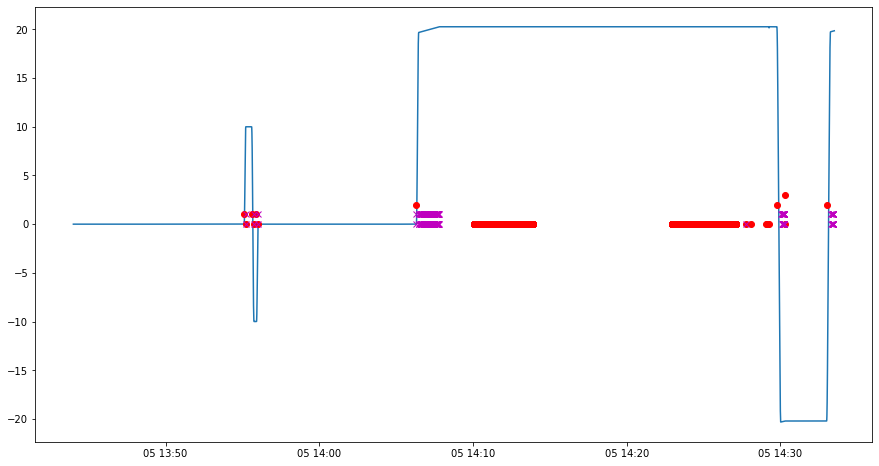

In [55]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['Position'])
plt.plot(pd.to_datetime(dfe.private_sndStamp, unit='s'), dfe['enabledSubstate'],'ro')
plt.plot(pd.to_datetime(dfi.private_sndStamp, unit='s'), dfi['inPosition'],'mx')

In [57]:
start1 = datetime.strptime('2020-11-05T13:55:00', '%Y-%m-%dT%H:%M:%S')
end1 = datetime.strptime('2020-11-05T13:56:20', '%Y-%m-%dT%H:%M:%S')
idx = np.logical_and(pd.to_datetime(df.private_sndStamp, unit='s') > start1, pd.to_datetime(df.private_sndStamp, unit='s') < end1)
df1 = df[idx]
idx = np.logical_and(pd.to_datetime(dfe.private_sndStamp, unit='s') > start1, pd.to_datetime(dfe.private_sndStamp, unit='s') < end1)
dfe1 = dfe[idx]
idx = np.logical_and(pd.to_datetime(dfi.private_sndStamp, unit='s') > start1, pd.to_datetime(dfi.private_sndStamp, unit='s') < end1)
dfi1 = dfi[idx]

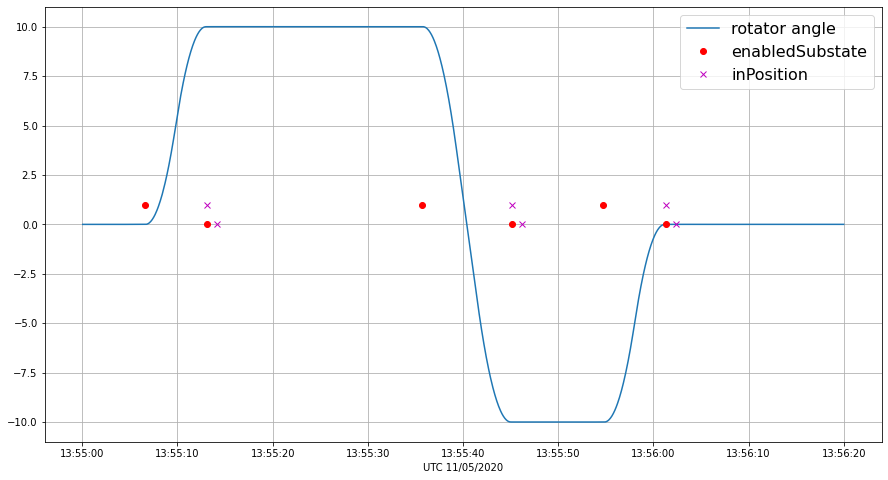

In [63]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(pd.to_datetime(df1.private_sndStamp, unit='s'), df1['Position'], label='rotator angle')
plt.plot(pd.to_datetime(dfe1.private_sndStamp, unit='s'), dfe1['enabledSubstate'],'ro', label='enabledSubstate')
plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.legend(prop={'size': 16})
plt.xlabel('UTC 11/05/2020')
plt.grid();

In [47]:
dfe1

NameError: name 'dfe1' is not defined

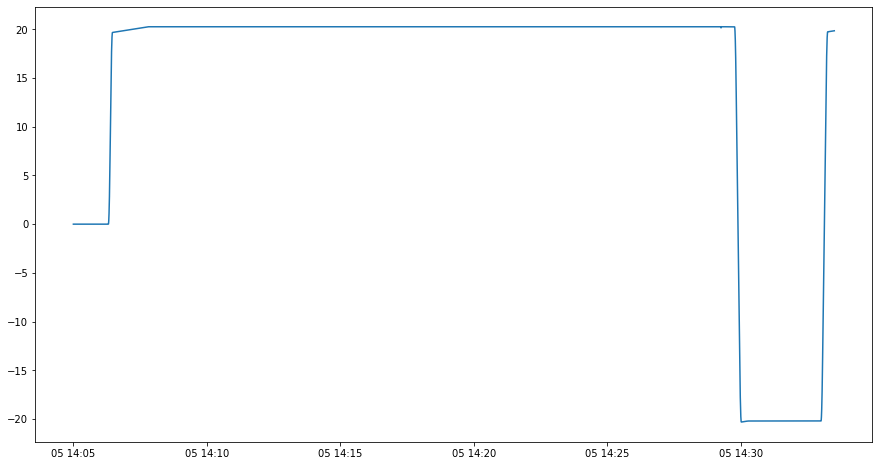

In [15]:
start2 = Time('2020-11-05T14:05:00') #this is UTC
end2 = Time('2020-11-05T14:33:30') #this is UTC
df2 = await client.select_time_series('lsst.sal.Rotator.Application', '*', 
                                     (start2-timedelta(seconds=37)).tai, (end2-timedelta(seconds=37)).tai, csc_index)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(pd.to_datetime(df2.private_sndStamp, unit='s'), df2['Position'])

In [17]:
print(max(df1.Position), min(df1.Position), max(df2.Position), min(df2.Position))

10.00033387322435 -10.00037448268202 20.278015188227215 -20.320142106724177
